In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as mnso 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Patient = pd.read_csv('PatientInfo.csv')
Policy = pd.read_csv('Policy.csv')
Region = pd.read_csv('Region.csv')
SearchTrend = pd.read_csv('SearchTrend.csv')
Floating = pd.read_csv('SeoulFloating.csv')
Time  = pd.read_csv('Time.csv')
TimeAge = pd.read_csv('TimeAge.csv')
TimeGender = pd.read_csv('TimeGender.csv')
TimePro = pd.read_csv('TimeProvince.csv')
Wheather = pd.read_csv('Weather.csv')
  



In [3]:
def overview(datasets):
    print("=" * 20 + " Basic Overview of Dataset " + "=" * 20)

    # First five rows
    print("\n" + "=" * 10 + " First Five Rows " + "=" * 10)
    print(datasets.head(5))

   

    # Dataset shape
    print("\n" + "=" * 10 + " Dataset Shape " + "=" * 10)
    print(f"Total columns: {len(datasets.columns)}")
    print(f"Total rows: {len(datasets)}")

    # Null values
    print("\n" + "=" * 10 + " Null Values in Each Column " + "=" * 10)
    print(datasets.isnull().sum())

    # Duplicate rows
    print("\n" + "=" * 10 + " Duplicate Rows " + "=" * 10)
    dup_count = datasets.duplicated().sum()
    print(f"Total duplicate rows: {dup_count}")

    # Statistical summary
    print("\n" + "=" * 10 + " Statistical Summary " + "=" * 10)
    print(datasets.describe())


In [4]:
overview(Patient)

==================== Basic Overview of Dataset ====================

========== First Five Rows ==========
   patient_id     sex  age country province         city  \
0  1000000001    male  50s   Korea    Seoul   Gangseo-gu   
1  1000000002    male  30s   Korea    Seoul  Jungnang-gu   
2  1000000003    male  50s   Korea    Seoul    Jongno-gu   
3  1000000004    male  20s   Korea    Seoul      Mapo-gu   
4  1000000005  female  20s   Korea    Seoul  Seongbuk-gu   

         infection_case infected_by contact_number symptom_onset_date  \
0       overseas inflow         NaN             75         2020-01-22   
1       overseas inflow         NaN             31                NaN   
2  contact with patient  2002000001             17                NaN   
3       overseas inflow         NaN              9         2020-01-26   
4  contact with patient  1000000002              2                NaN   

  confirmed_date released_date deceased_date     state  
0     2020-01-23    2020-02-05      

In [5]:
dataset_names = ["Patient", "Policy", "Region", "SearchTrend", "Floating", "Time", "TimeAge", "TimeGender", "TimePro", "Wheather"]
datasets = [Patient, Policy, Region, SearchTrend, Floating, Time, TimeAge, TimeGender, TimePro, Wheather]

for name, df in zip(dataset_names, datasets):
    null_columns = df.columns[df.isnull().any()]
    if not null_columns.empty:
        print(f"\n{name} has Null values:")
        for col in null_columns:
            pct = ((df[col].isnull().sum() / len(df)) * 100).round(0)
            print(f"- {col}: {df[col].isnull().sum()} nulls ({pct}%)")
    else:
        print(f"\n{name} has no null values.")

    print("\n" + "=" * 90 + "\n")

    # Drop columns with >30% nulls
    high_null_cols = [col for col in df.columns if ((df[col].isnull().sum() / len(df)) * 100).round(0) > 30.0]
    columns_dropped = df[high_null_cols].copy()
    
    for col in high_null_cols:
        df.drop(col, axis=1, inplace=True)
        print(f"Column '{col}' deleted successfully.")

    # Fill missing values in remaining columns
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])
            else:
                df[col] = df[col].fillna(df[col].median())
            print(f"Successfully replaced null values in '{col}'.")




Patient has Null values:
- sex: 1122 nulls (22.0%)
- age: 1380 nulls (27.0%)
- city: 94 nulls (2.0%)
- infection_case: 919 nulls (18.0%)
- infected_by: 3819 nulls (74.0%)
- contact_number: 4374 nulls (85.0%)
- symptom_onset_date: 4475 nulls (87.0%)
- confirmed_date: 3 nulls (0.0%)
- released_date: 3578 nulls (69.0%)
- deceased_date: 5099 nulls (99.0%)


Column 'infected_by' deleted successfully.
Column 'contact_number' deleted successfully.
Column 'symptom_onset_date' deleted successfully.
Column 'released_date' deleted successfully.
Column 'deceased_date' deleted successfully.
Successfully replaced null values in 'sex'.
Successfully replaced null values in 'age'.
Successfully replaced null values in 'city'.
Successfully replaced null values in 'infection_case'.
Successfully replaced null values in 'confirmed_date'.

Policy has Null values:
- detail: 2 nulls (3.0%)
- end_date: 37 nulls (61.0%)


Column 'end_date' deleted successfully.
Successfully replaced null values in 'detail'.

Re

In [9]:
# till now - 
# 1) created function overview that help us to get breif overview of any dataset
# 2)checked all columns of each dataset and identified the columns with null values
# 3)calculated the percentage of null values . Droped the columns which has more that 30% null values
# 4)replaced null values of columns (objects with mode and numeric with median )

##### till now - 
##### 1) created function overview that help us to get breif overview of any dataset
##### 2)checked all columns of each dataset and identified the columns with null values
##### 3)calculated the percentage of null values . Droped the columns which has more that 30% null values
##### 4)replaced null values of columns (objects with mode and numeric with median )

Visualization 

In [11]:
Region.columns 

Index(['code', 'province', 'city', 'latitude', 'longitude',
       'elementary_school_count', 'kindergarten_count', 'university_count',
       'academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio',
       'nursing_home_count'],
      dtype='object')

In [15]:
# Assuming your education dataset is called edu_df
import plotly.express as px

fig = px.scatter_mapbox(
    Region,  # <-- use the correct dataframe here
    lat="latitude",
    lon="longitude",
    size="elementary_school_count",
    color="elementary_school_count",
    hover_name="city",
    hover_data=["province", "kindergarten_count", "university_count", "nursing_home_count"],
    color_continuous_scale="Viridis",
    size_max=20,
    zoom=5,
    mapbox_style="carto-positron"
    
)
fig.show()


C:\Users\Prasad.LAPTOP-R00KVI21\AppData\Local\Temp\ipykernel_21472\1548581813.py:4: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [16]:
Region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


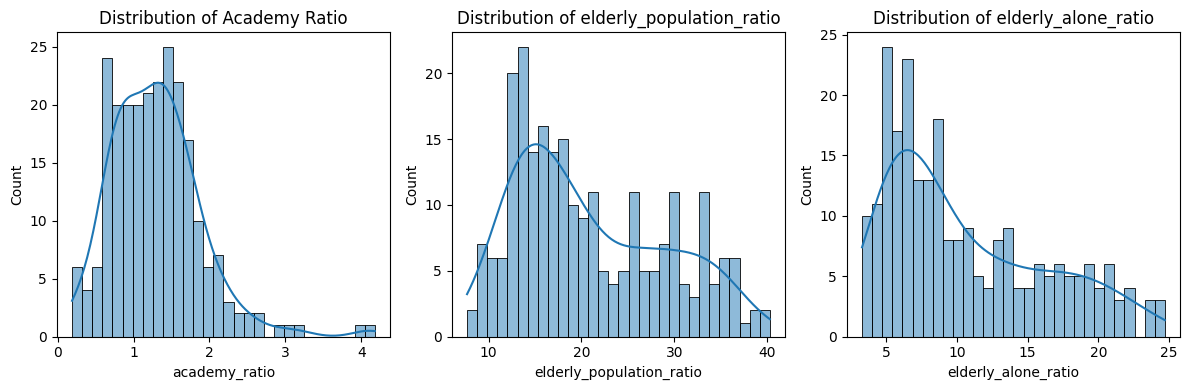

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
sns.histplot(Region['academy_ratio'] , kde = True,bins = 30)
plt.title("Distribution of Academy Ratio")

plt.subplot(1,3,2)
sns.histplot(Region['elderly_population_ratio'] , kde = True,bins = 30)
plt.title("Distribution of elderly_population_ratio")

plt.subplot(1,3,3)
sns.histplot(Region['elderly_alone_ratio'] , kde = True,bins = 30)
plt.title('Distribution of elderly_alone_ratio')

plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

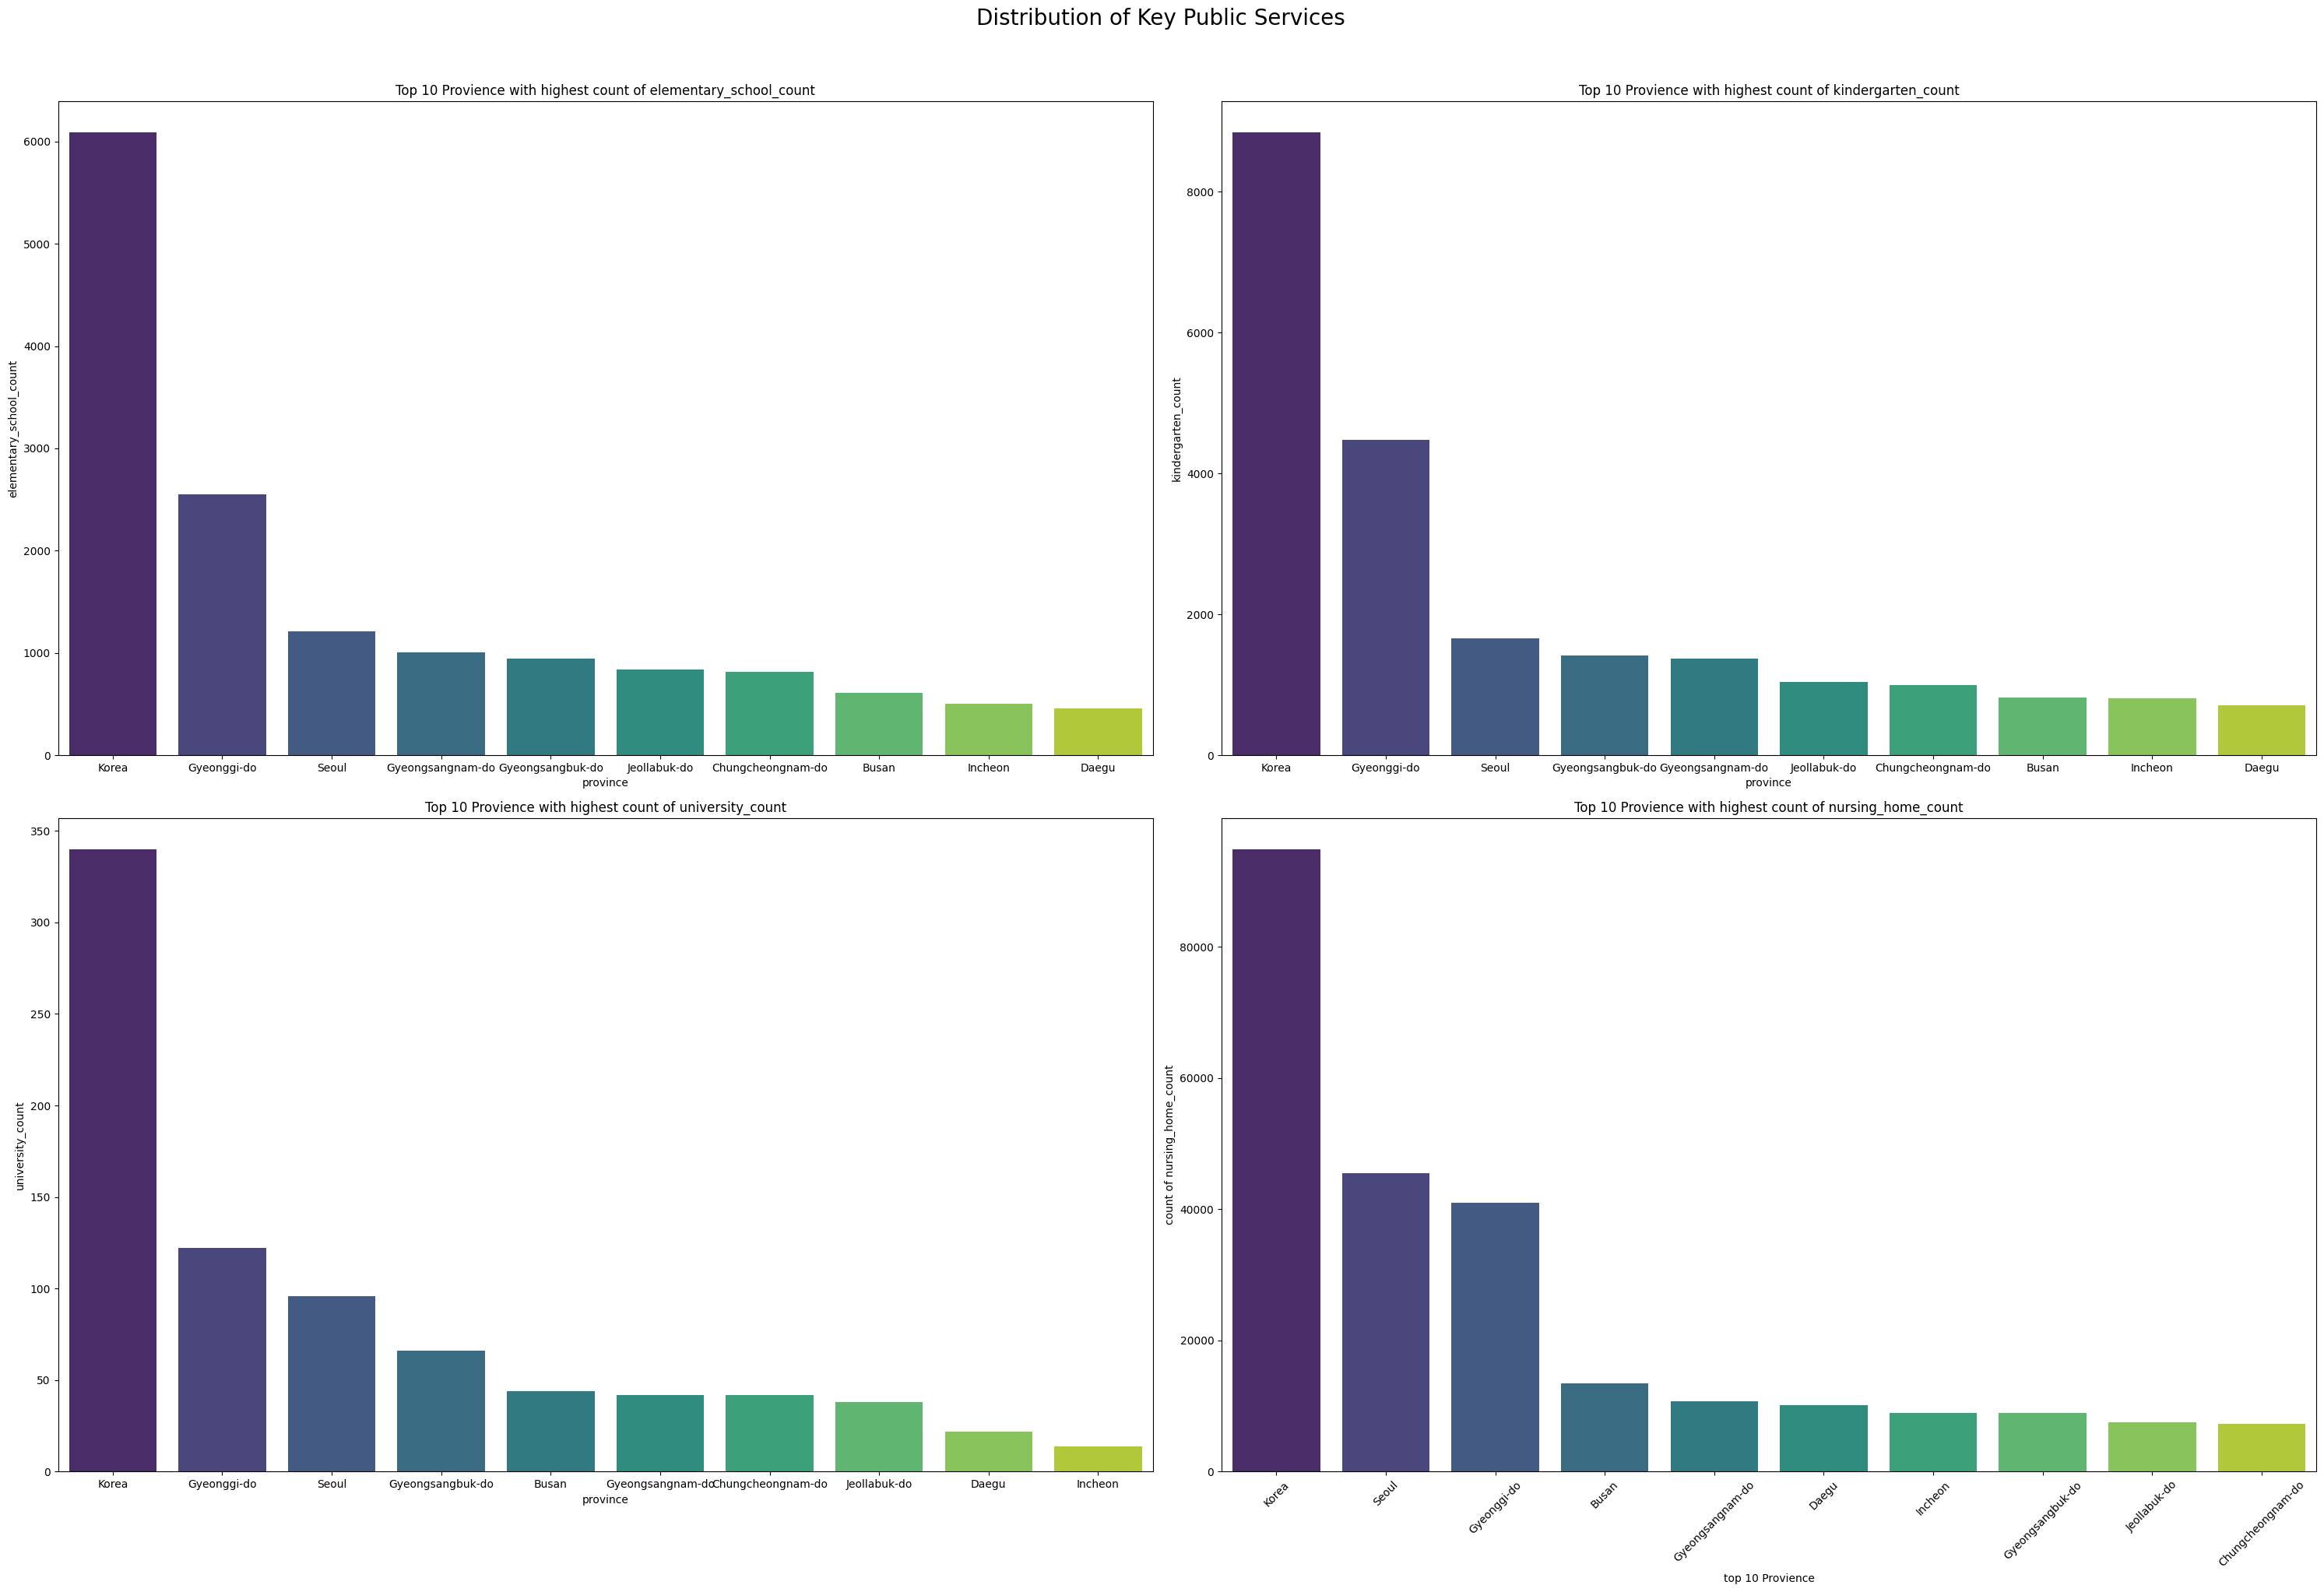

In [41]:
top10Province = Region.groupby("province")[
    ["elementary_school_count", "kindergarten_count", "university_count", "nursing_home_count"]].sum().sort_values(by="nursing_home_count", ascending=False).head(10)
plt.figure(figsize=(12, 4))




fig , axes = plt.subplots(2,2,figsize=(30, 20))
axes = axes.flatten()

for idx , col in enumerate(top10Province):
    sns.barplot(data = top10Province.sort_values(by=col, ascending=False).reset_index() , x = "province" , y = col , palette="viridis" , ax = axes[idx])
    axes[idx].set_title(f"Top 10 Provience with highest count of {col}")
    plt.xlabel(f"top 10 Provience")
    plt.ylabel(f"count of {col}")
fig.suptitle("Distribution of Key Public Services " , fontsize=20, y=1.02)
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

In [48]:
Patient['age'] = Patient['age'].str.replace('s' , " " )
Patient['age'] = Patient['age'].astype(int)

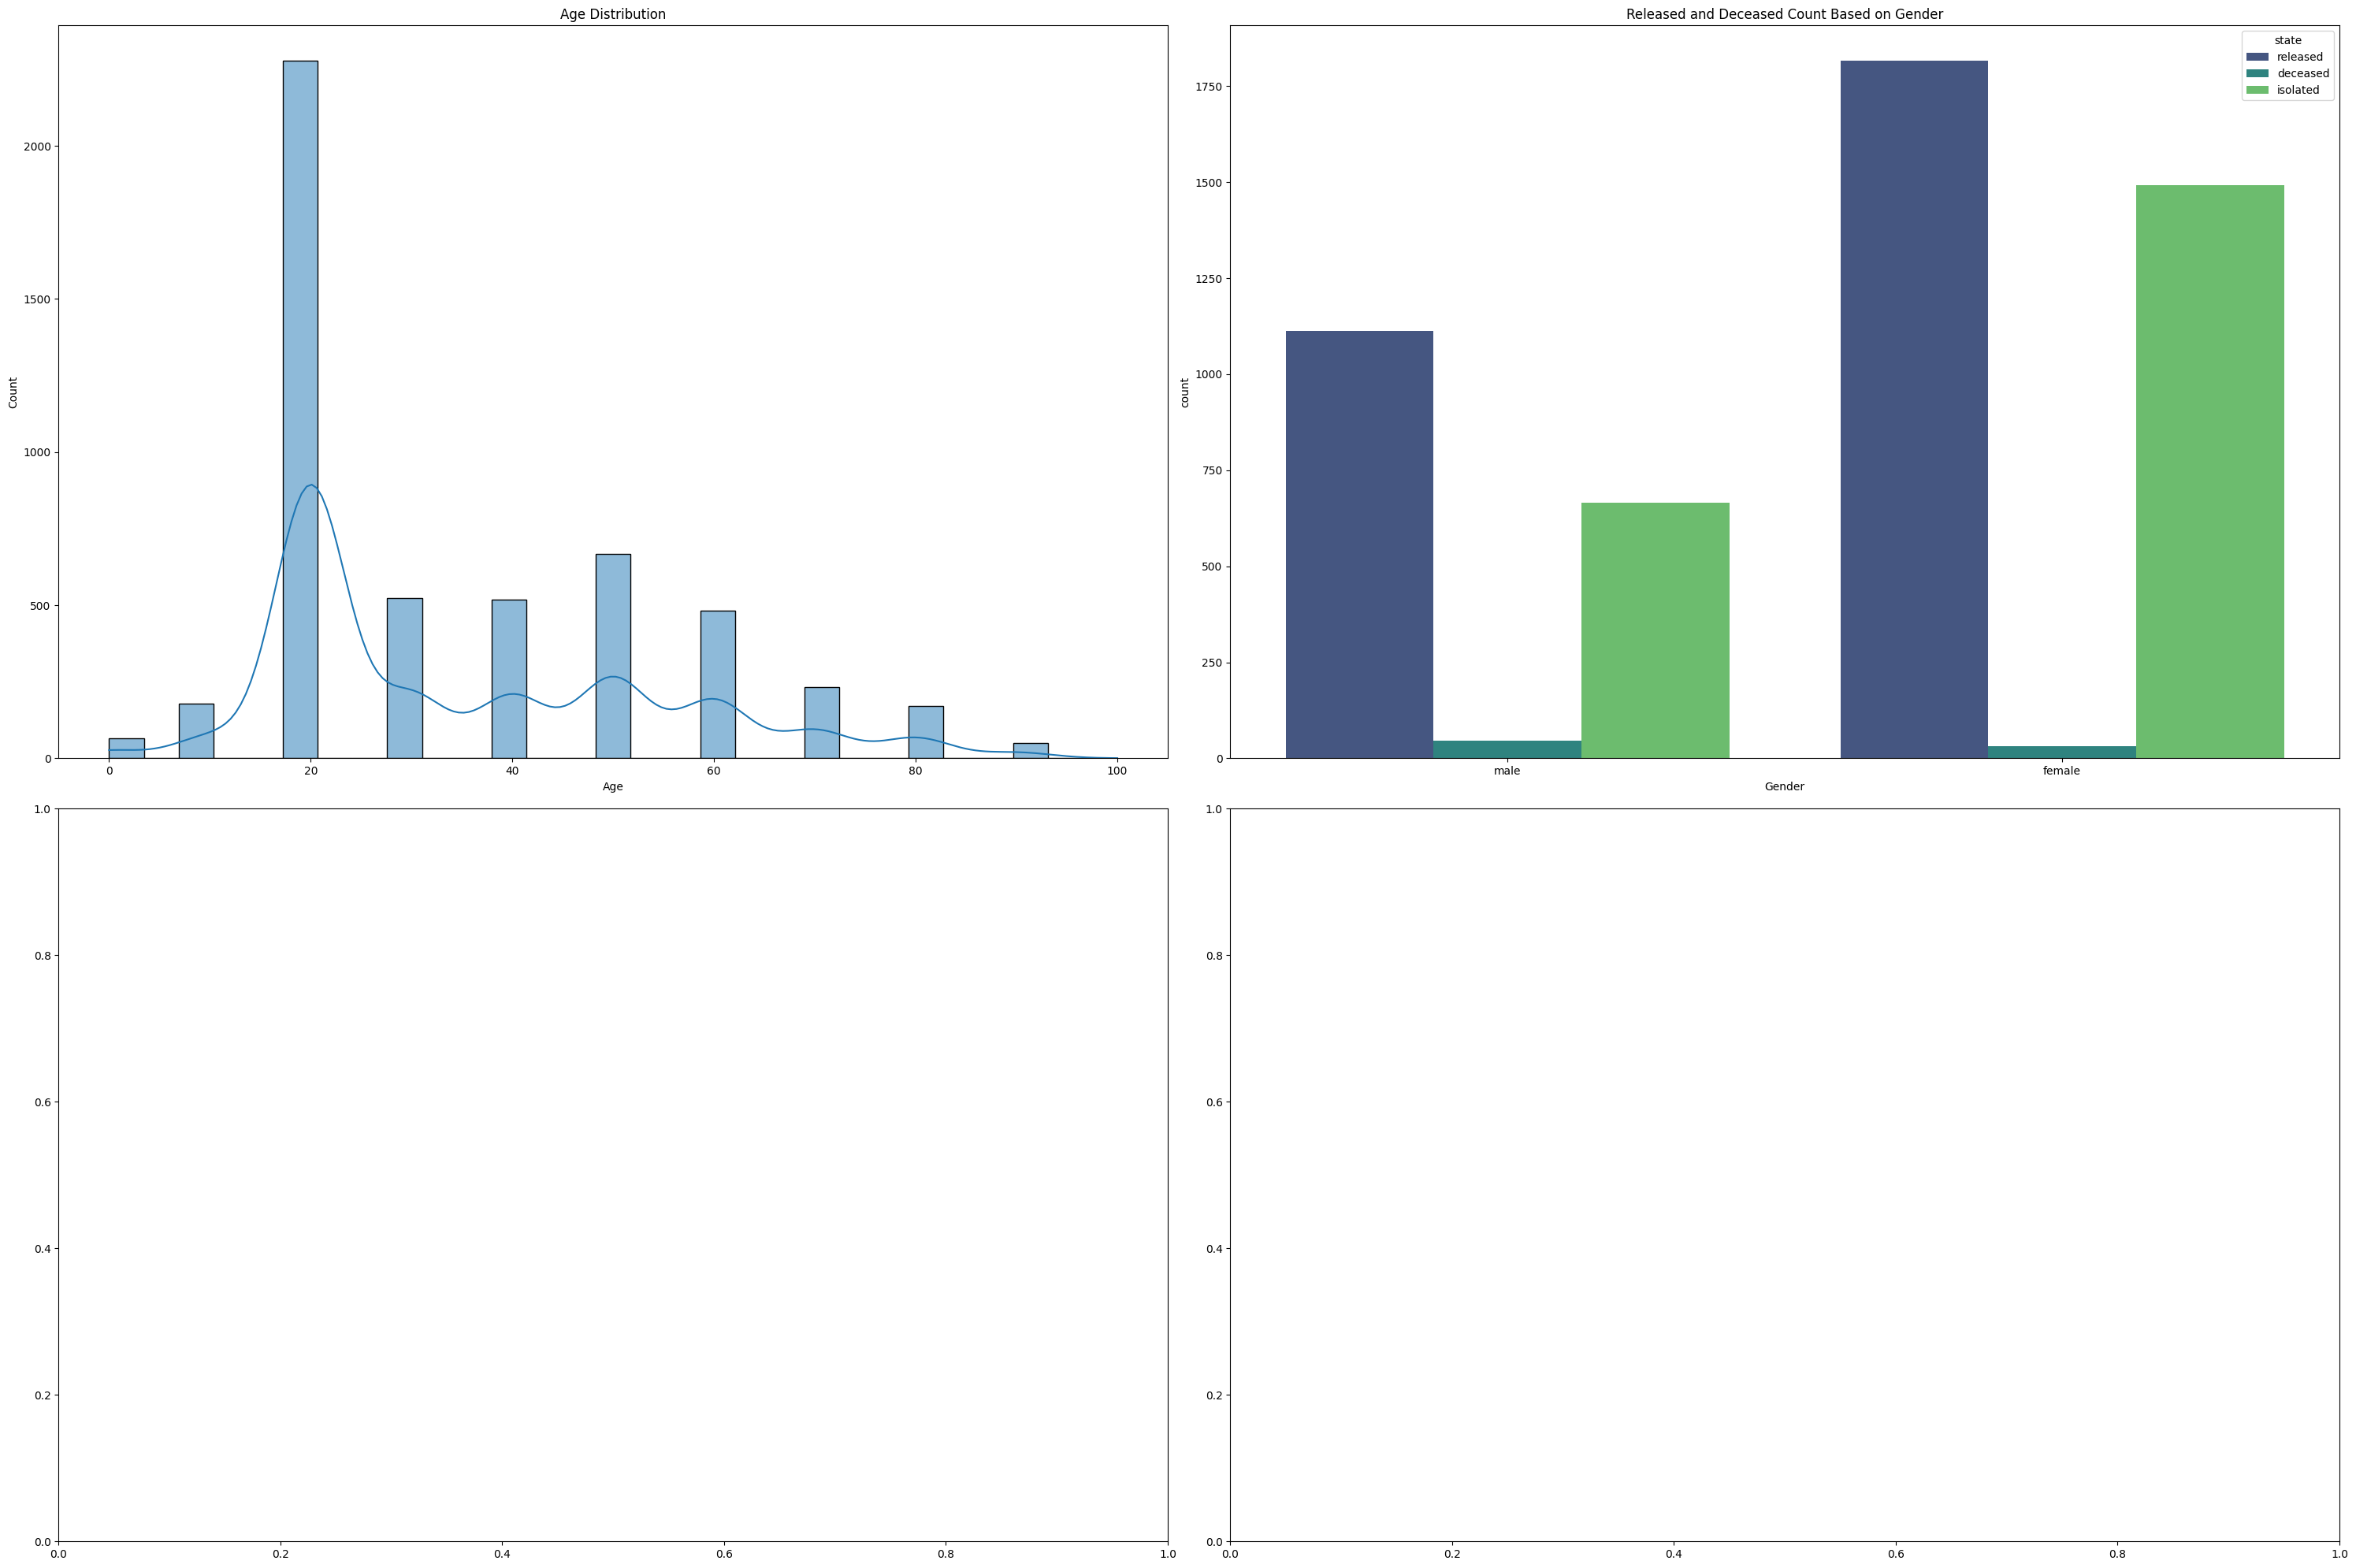

In [64]:
Patient_group = Patient.groupby(["country", "province", "city"])[['sex', 'age', 'infection_case', 'state']].count()

fig, axes = plt.subplots(2, 2, figsize=(30, 20))

# Age distribution
sns.histplot(Patient['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

# Released and Deceased count based on gender
sns.countplot(data=Patient, x='sex', hue='state', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Released and Deceased Count Based on Gender')
axes[0, 1].set_xlabel('Gender')

plt.tight_layout()
plt.show()
